<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/Halloween_Predict_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Machine_Learning/Halloween_price_prediction/train.csv')
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [3]:
sample_sub= pd.read_csv('/content/drive/MyDrive/Machine_Learning/Halloween_price_prediction/sample_submission.csv')
sample_sub.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [4]:
df['Product_id'].duplicated().sum()

0

In [5]:
df.set_index('Product_id', inplace= True)

In [6]:
df.head(2)

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6368 entries, BRAE2NF6JA5GUEXG to CAGE53FSAFWZRHFF
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6363 non-null   float64
 1   instock_date      6368 non-null   object 
 2   Market_Category   6368 non-null   int64  
 3   Customer_name     6157 non-null   object 
 4   Loyalty_customer  6368 non-null   object 
 5   Product_Category  6368 non-null   object 
 6   Grade             6368 non-null   int64  
 7   Demand            6368 non-null   int64  
 8   Discount_avail    6330 non-null   float64
 9   charges_1         6170 non-null   float64
 10  charges_2 (%)     6163 non-null   float64
 11  Minimum_price     6330 non-null   float64
 12  Maximum_price     6025 non-null   float64
 13  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 746.2+ KB


In [8]:
df.shape

(6368, 14)

### Data Cleaning 

In [9]:
df['instock_date']= pd.to_datetime(df['instock_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6368 entries, BRAE2NF6JA5GUEXG to CAGE53FSAFWZRHFF
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Stall_no          6363 non-null   float64       
 1   instock_date      6368 non-null   datetime64[ns]
 2   Market_Category   6368 non-null   int64         
 3   Customer_name     6157 non-null   object        
 4   Loyalty_customer  6368 non-null   object        
 5   Product_Category  6368 non-null   object        
 6   Grade             6368 non-null   int64         
 7   Demand            6368 non-null   int64         
 8   Discount_avail    6330 non-null   float64       
 9   charges_1         6170 non-null   float64       
 10  charges_2 (%)     6163 non-null   float64       
 11  Minimum_price     6330 non-null   float64       
 12  Maximum_price     6025 non-null   float64       
 13  Selling_Price     6327 non-null   float64       
dtypes:

In [10]:
df.isnull().sum()

Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [11]:
df[df['Selling_Price'].isnull()].head()

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,,
NKCECW7BSTZBHH6R,2.0,2015-09-24 17:26:11,268,Tyrus,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,NaN
RNGE7M92GMQNSPUG,7.0,2015-08-15 23:12:45,447,Kristen,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,NaN
SHOEFDVVFH5WUUMN,45.0,2015-09-22 15:26:53,14,Olin,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,NaN
PBXE8FW6ZZZF2RQA,39.0,2015-11-21 03:56:22,14,Giovonni,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,NaN,NaN
SHIE9J6P8QHDZWXF,27.0,2015-09-23 14:25:52,198,Donavan,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,NaN


In [12]:
rows_to_Drop= list(df[df['Selling_Price'].isnull()].index)
print(rows_to_Drop)

['NKCECW7BSTZBHH6R', 'RNGE7M92GMQNSPUG', 'SHOEFDVVFH5WUUMN', 'PBXE8FW6ZZZF2RQA', 'SHIE9J6P8QHDZWXF', 'NKCE7MMGF9C62JPD', 'KTAEHE9KPZU5JK2P', 'BRAEYPGFSSP2NZKF', 'FAFEGVSJGFU5B9VH', 'BRAE7FNDFAB2PRQD', 'BRAE785SGF7FDQ2P', 'SHIE8N77ZEBQHFWU', 'NKCE5TFVVFYUPYHS', 'BRAEDSGAURJGHHU5', 'NKCDZHF8XYR3GMQ2', 'BRAEDUXKP5AK3JZN', 'VTEEBGHKZAMGQAHN', 'NKCDYPDSUPDSVYU3', 'SHIED4DW3GRFK8MJ', 'PBXEAP3SADG7YJAM', 'NKCEFAG9TAF3VAFY', 'CRTECN2RQTBXZCNG', 'DBLE5GN47ZHKCCCN', 'MUGEAGGKVNSUCWUG', 'NKCECWKZYKVUJ9HU', 'CRTECN2QYGGUZ9HW', 'WATEBGPF2YN8ZRHN', 'SHIE86XAGBVWRWH3', 'CRTECN2QZATWNKPC', 'BRAEDQEEVBWB4FPB', 'CRTECN2QSGBHXGMN', 'SWSEHK8ZMMYXGEFZ', 'NKCEGMVCHERZZQMW', 'BRAE8WPSSY2KCAJY', 'RTRECZVP6VGBTEGT', 'BRAECFAQGK4HYFU8', 'BRAEBMWVSDWZYNK8', 'CRTEB774ZFD3FGHQ', 'CAGE8TQ8KFEGHY9M', 'CRTECN2QVSCZAQEA', 'MUGE8DAUYGPWG9AE']


In [13]:
df.drop(index= rows_to_Drop, inplace=True)

In [14]:
df.isnull().sum()

Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [15]:
# Stall_no
df.Stall_no.describe()

count    6322.000000
mean       25.312243
std        14.331376
min         1.000000
25%        13.000000
50%        25.000000
75%        37.000000
max        50.000000
Name: Stall_no, dtype: float64

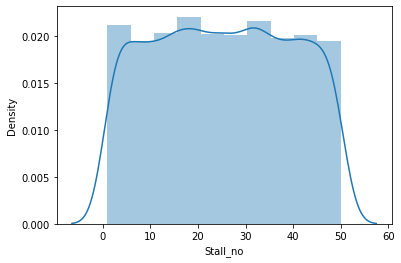

In [16]:
sns.distplot(df.Stall_no, bins=10)
plt.show()

In [17]:
df.Stall_no.mode()[0]

20.0

In [18]:
df.Stall_no= df.Stall_no.fillna(df.Stall_no.mode()[0])

In [19]:
#Discount Available
df.Discount_avail.value_counts()

0.0    5409
1.0     881
Name: Discount_avail, dtype: int64

In [20]:
df.Discount_avail = df.Discount_avail.fillna(df.Discount_avail.fillna(df.Discount_avail.mode()[0]))

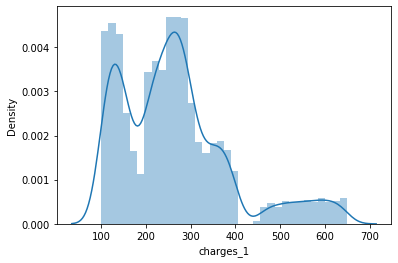

In [21]:
sns.distplot(df.charges_1)
plt.show()

In [22]:
df.charges_1 = df.charges_1.fillna(df.charges_1.median())

In [23]:
df['charges_2 (%)'].describe()

count    6123.000000
mean       10.152866
std         4.317195
min         1.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        17.000000
Name: charges_2 (%), dtype: float64

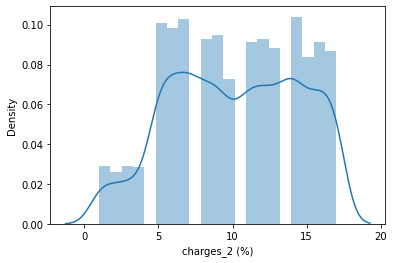

In [24]:
sns.distplot(df['charges_2 (%)'])
plt.show()

In [25]:
df['charges_2 (%)'].value_counts()

14.0    485
7.0     479
5.0     470
6.0     459
9.0     443
8.0     433
12.0    432
11.0    426
16.0    426
13.0    411
17.0    404
15.0    391
10.0    339
1.0     135
3.0     135
4.0     133
2.0     122
Name: charges_2 (%), dtype: int64

In [26]:
df['charges_2 (%)'] = df['charges_2 (%)'].fillna(df['charges_2 (%)'].median())

In [27]:
df.Minimum_price.describe()

count     6289.000000
mean      3533.844490
std       2193.700577
min          1.000000
25%       1882.000000
50%       3164.000000
75%       4697.000000
max      17580.000000
Name: Minimum_price, dtype: float64

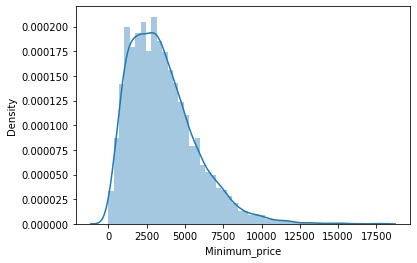

In [28]:
sns.distplot(df.Minimum_price)
plt.show()

In [29]:
df.Minimum_price = df.Minimum_price.fillna(df.Minimum_price.median())

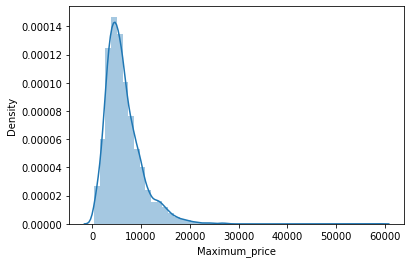

In [30]:
sns.distplot(df.Maximum_price)
plt.show()

In [31]:
df.Maximum_price = df.Maximum_price.fillna(df.Maximum_price.median())

In [32]:
df.isnull().sum()

Stall_no              0
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [33]:
#Customer_name column is not relevant
df.drop('Customer_name', axis=1, inplace=True)
df.isnull().sum()

Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

### Missing values are handled

In [34]:
df.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [35]:
df['instock_year'] = df['instock_date'].dt.year
df['instock_month'] = df['instock_date'].dt.month
df['instock_day'] = df['instock_date'].dt.day
df.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_day
Product_id,,,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,22
TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,27
BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,18
WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,28
JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,29


In [36]:
df.drop('instock_date', axis=1, inplace=True)

In [37]:
df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_day
Product_id,,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,22
TUNE8SFB6RJN2HSD,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,27
BRAEAR7WZPQGPBZU,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,18
WATDZ2ZQ8JPDHCTJ,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,28
JWSEBUKYQPMBZ3RK,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,29


### EDA

In [38]:
num_col= list(df.select_dtypes(exclude= ['object']).columns)
print(num_col)

['Stall_no', 'Market_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'Selling_Price', 'instock_year', 'instock_month', 'instock_day']


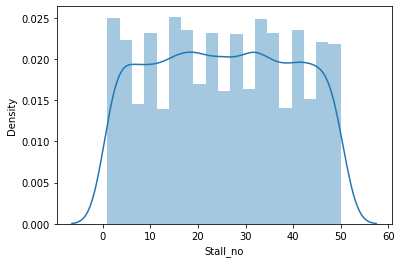

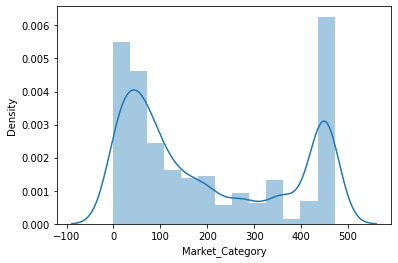

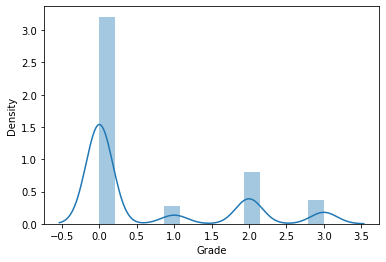

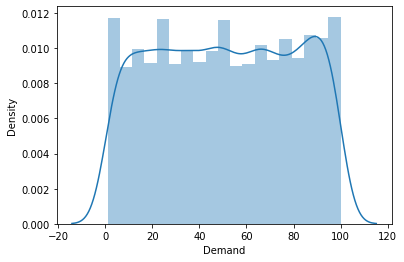

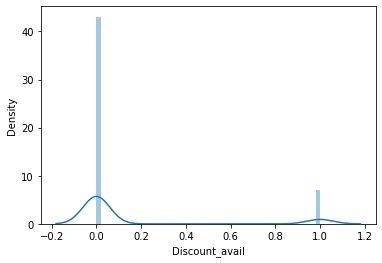

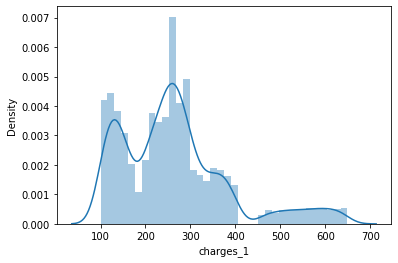

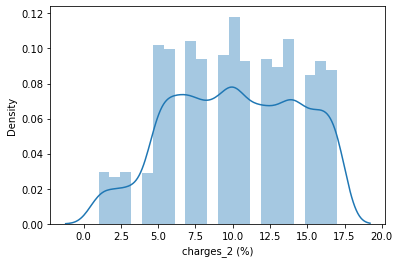

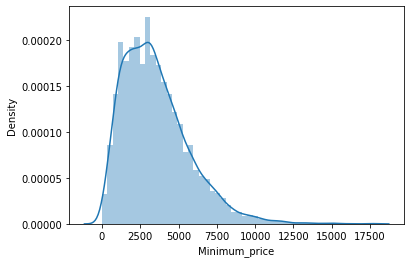

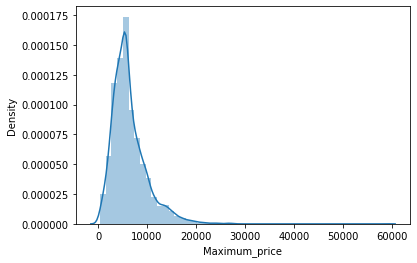

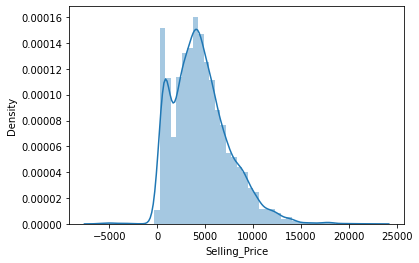

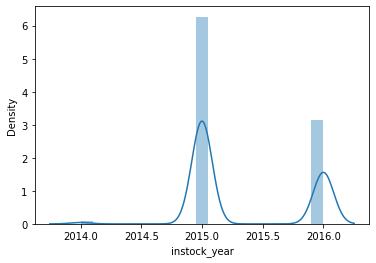

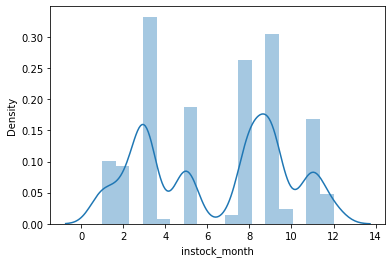

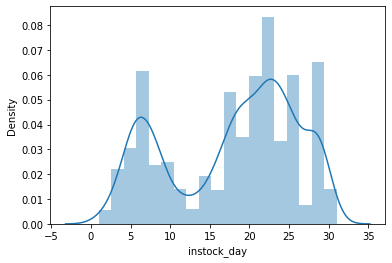

In [39]:
for col in num_col:
  sns.distplot(df[col])
  plt.show()

In [40]:
df.Grade.value_counts(normalize=True)

0    0.687688
2    0.173068
3    0.079343
1    0.059902
Name: Grade, dtype: float64

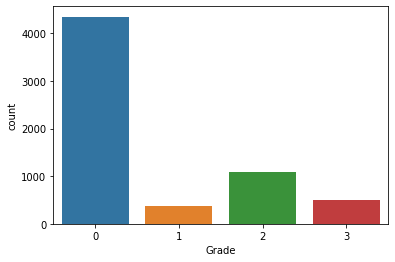

In [41]:
sns.countplot(df.Grade)
plt.show()

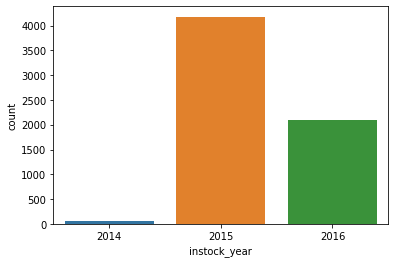

In [42]:
sns.countplot(df.instock_year)
plt.show()

In [43]:
df.instock_year.value_counts(normalize=True)

2015    0.660028
2016    0.330804
2014    0.009167
Name: instock_year, dtype: float64

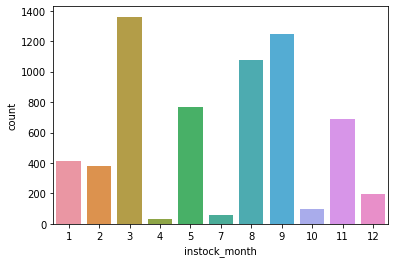

In [44]:
sns.countplot(df.instock_month)
plt.show()

In [45]:
df.Discount_avail.value_counts(normalize=True)

0.0    0.860755
1.0    0.139245
Name: Discount_avail, dtype: float64

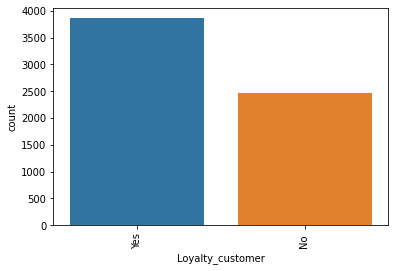

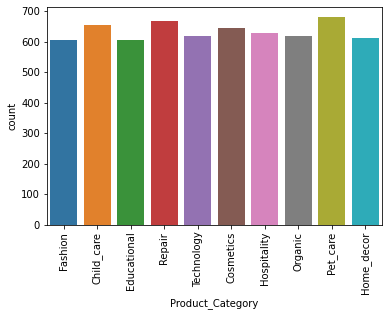

In [46]:
for col in df.select_dtypes('object').columns:
  sns.countplot(df[col])
  plt.xticks(rotation=90)
  plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6327 entries, BRAE2NF6JA5GUEXG to CAGE53FSAFWZRHFF
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6327 non-null   float64
 1   Market_Category   6327 non-null   int64  
 2   Loyalty_customer  6327 non-null   object 
 3   Product_Category  6327 non-null   object 
 4   Grade             6327 non-null   int64  
 5   Demand            6327 non-null   int64  
 6   Discount_avail    6327 non-null   float64
 7   charges_1         6327 non-null   float64
 8   charges_2 (%)     6327 non-null   float64
 9   Minimum_price     6327 non-null   float64
 10  Maximum_price     6327 non-null   float64
 11  Selling_Price     6327 non-null   float64
 12  instock_year      6327 non-null   int64  
 13  instock_month     6327 non-null   int64  
 14  instock_day       6327 non-null   int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 1.0+ MB


In [48]:
df['Discount_avail'] = df['Discount_avail'].apply(lambda x: 'Yes' if x == 1.0 else 'No')
df['instock_year'] = df['instock_year'].apply(lambda x : str(x))
df['instock_month'] = df['instock_month'].apply(lambda x : 'month_' + str(x))
df['Grade'] = df['Grade'].apply(lambda x : 'Grade_'+str(x))

In [49]:
df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_day
Product_id,,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2,Yes,Fashion,Grade_1,68,No,376.0,11.0,2983.0,4713.0,4185.947700,2015,month_8,22
TUNE8SFB6RJN2HSD,38.0,24,Yes,Fashion,Grade_0,51,No,397.0,12.0,7495.0,10352.0,9271.490256,2016,month_3,27
BRAEAR7WZPQGPBZU,9.0,447,Yes,Child_care,Grade_0,10,No,250.0,9.0,5752.0,7309.0,6785.701362,2015,month_8,18
WATDZ2ZQ8JPDHCTJ,50.0,23,Yes,Educational,Grade_2,48,No,144.0,13.0,5090.0,20814.0,13028.917824,2016,month_3,28
JWSEBUKYQPMBZ3RK,7.0,63,Yes,Repair,Grade_1,35,Yes,211.0,4.0,2430.0,9261.0,906.553935,2016,month_3,29


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6327 entries, BRAE2NF6JA5GUEXG to CAGE53FSAFWZRHFF
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6327 non-null   float64
 1   Market_Category   6327 non-null   int64  
 2   Loyalty_customer  6327 non-null   object 
 3   Product_Category  6327 non-null   object 
 4   Grade             6327 non-null   object 
 5   Demand            6327 non-null   int64  
 6   Discount_avail    6327 non-null   object 
 7   charges_1         6327 non-null   float64
 8   charges_2 (%)     6327 non-null   float64
 9   Minimum_price     6327 non-null   float64
 10  Maximum_price     6327 non-null   float64
 11  Selling_Price     6327 non-null   float64
 12  instock_year      6327 non-null   object 
 13  instock_month     6327 non-null   object 
 14  instock_day       6327 non-null   int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 1.0+ MB


In [51]:
cat_cols= list(df.select_dtypes('object').columns)
df_dummy= pd.get_dummies(df[cat_cols], drop_first=True )
df_dummy.head()

,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2015,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_3,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
TUNE8SFB6RJN2HSD,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
BRAEAR7WZPQGPBZU,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
WATDZ2ZQ8JPDHCTJ,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
JWSEBUKYQPMBZ3RK,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [52]:
df_num= pd.concat([df, df_dummy], axis= 1)
df_num.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_day,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2015,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_3,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2,Yes,Fashion,Grade_1,68,No,376.0,11.0,2983.0,4713.0,4185.947700,2015,month_8,22,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
TUNE8SFB6RJN2HSD,38.0,24,Yes,Fashion,Grade_0,51,No,397.0,12.0,7495.0,10352.0,9271.490256,2016,month_3,27,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
BRAEAR7WZPQGPBZU,9.0,447,Yes,Child_care,Grade_0,10,No,250.0,9.0,5752.0,7309.0,6785.701362,2015,month_8,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
WATDZ2ZQ8JPDHCTJ,50.0,23,Yes,Educational,Grade_2,48,No,144.0,13.0,5090.0,20814.0,13028.917824,2016,month_3,28,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
JWSEBUKYQPMBZ3RK,7.0,63,Yes,Repair,Grade_1,35,Yes,211.0,4.0,2430.0,9261.0,906.553935,2016,month_3,29,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [53]:
df_num.drop(cat_cols, axis=1, inplace=True)
df_num.head()

,Stall_no,Market_Category,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_day,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2015,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_3,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2,68,376.0,11.0,2983.0,4713.0,4185.947700,22,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
TUNE8SFB6RJN2HSD,38.0,24,51,397.0,12.0,7495.0,10352.0,9271.490256,27,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
BRAEAR7WZPQGPBZU,9.0,447,10,250.0,9.0,5752.0,7309.0,6785.701362,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
WATDZ2ZQ8JPDHCTJ,50.0,23,48,144.0,13.0,5090.0,20814.0,13028.917824,28,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
JWSEBUKYQPMBZ3RK,7.0,63,35,211.0,4.0,2430.0,9261.0,906.553935,29,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [54]:
cor= abs(df_num.corr())
cor

,Stall_no,Market_Category,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_day,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2015,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_3,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Stall_no,1.000000,0.005448,0.002907,0.010086,0.004056,0.000458,0.005935,0.011674,0.031372,0.008017,0.016589,0.000361,0.027035,0.011849,0.005293,0.001761,0.002133,0.001576,0.000146,0.007590,0.016049,0.006587,0.020026,0.016942,0.016186,0.001134,0.007767,0.025516,0.012893,0.008935,0.011700,0.012408,0.012735,0.026735,0.017594
Market_Category,0.005448,1.000000,0.018040,0.018823,0.024250,0.195451,0.128926,0.138711,0.090786,0.033291,0.005947,0.000715,0.003991,0.008043,0.009166,0.017904,0.002492,0.006523,0.018484,0.084753,0.099934,0.072656,0.003017,0.144349,0.151794,0.011138,0.075063,0.007440,0.017427,0.152155,0.010633,0.104604,0.038172,0.039747,0.024759
Demand,0.002907,0.018040,1.000000,0.008235,0.017615,0.009758,0.002817,0.000601,0.007467,0.004703,0.011031,0.021080,0.013235,0.002287,0.022631,0.001265,0.016755,0.001621,0.009034,0.012464,0.015078,0.004385,0.008965,0.013964,0.011732,0.003677,0.026399,0.015400,0.008906,0.010521,0.033715,0.000246,0.012941,0.010668,0.014380
charges_1,0.010086,0.018823,0.008235,1.000000,0.262904,0.018346,0.010040,0.052272,0.003660,0.006308,0.041534,0.331462,0.278605,0.035089,0.026433,0.367494,0.315754,0.045499,0.753219,0.015107,0.021938,0.014674,0.003980,0.009625,0.011721,0.014563,0.002727,0.008815,0.000561,0.008269,0.006525,0.004478,0.023636,0.013496,0.006169
charges_2 (%),0.004056,0.024250,0.017615,0.262904,1.000000,0.006313,0.009836,0.008871,0.016421,0.012109,0.343624,0.054230,0.271877,0.251828,0.056373,0.237364,0.323508,0.401836,0.061061,0.024163,0.003639,0.009400,0.018347,0.001667,0.001395,0.004175,0.004069,0.002541,0.010389,0.009360,0.006633,0.011510,0.004180,0.011046,0.000343
Minimum_price,0.000458,0.195451,0.009758,0.018346,0.006313,1.000000,0.689177,0.698393,0.016198,0.092555,0.008102,0.017361,0.007529,0.000442,0.004279,0.019802,0.012547,0.002677,0.004486,0.115652,0.126072,0.013999,0.011743,0.050143,0.054817,0.037545,0.217799,0.048911,0.048098,0.168996,0.019452,0.057535,0.053654,0.007837,0.263487
Maximum_price,0.005935,0.128926,0.002817,0.010040,0.009836,0.689177,1.000000,0.749453,0.097664,0.113341,0.016484,0.025060,0.009952,0.000720,0.002222,0.006171,0.002019,0.004112,0.015124,0.099421,0.030836,0.205590,0.001076,0.185566,0.188784,0.034171,0.148140,0.048193,0.048174,0.329701,0.028641,0.021076,0.031376,0.036354,0.290589
Selling_Price,0.011674,0.138711,0.000601,0.052272,0.008871,0.698393,0.749453,1.000000,0.113459,0.095660,0.006148,0.029593,0.032932,0.001195,0.009864,0.024947,0.001087,0.005149,0.029708,0.101393,0.062671,0.138135,0.510635,0.051474,0.057673,0.039884,0.168664,0.093602,0.091392,0.218892,0.017125,0.066612,0.031359,0.001171,0.203205
instock_day,0.031372,0.090786,0.007467,0.003660,0.016421,0.016198,0.097664,0.113459,1.000000,0.092175,0.000016,0.011313,0.003529,0.010474,0.006028,0.001011,0.013707,0.000168,0.004650,0.017239,0.024532,0.021697,0.142027,0.064259,0.076006,0.053531,0.074715,0.238449,0.074517,0.282842,0.024626,0.440622,0.037683,0.067529,0.349405
Loyalty_customer_Yes,0.008017,0.033291,0.004703,0.006308,0.012109,0.092555,0.113341,0.095660,0.092175,1.000000,0.026693,0.004730,0.006969,0.021895,0.012282,0.014440,0.005800,0.002612,0.006136,0.018654,0.004616,0.031873,0.022246,0.070452,0.062387,0.141322,0.037249,0.002330,0.081880,0.039632,0.054290,0.052732,0.078826,0.058924,0.036314


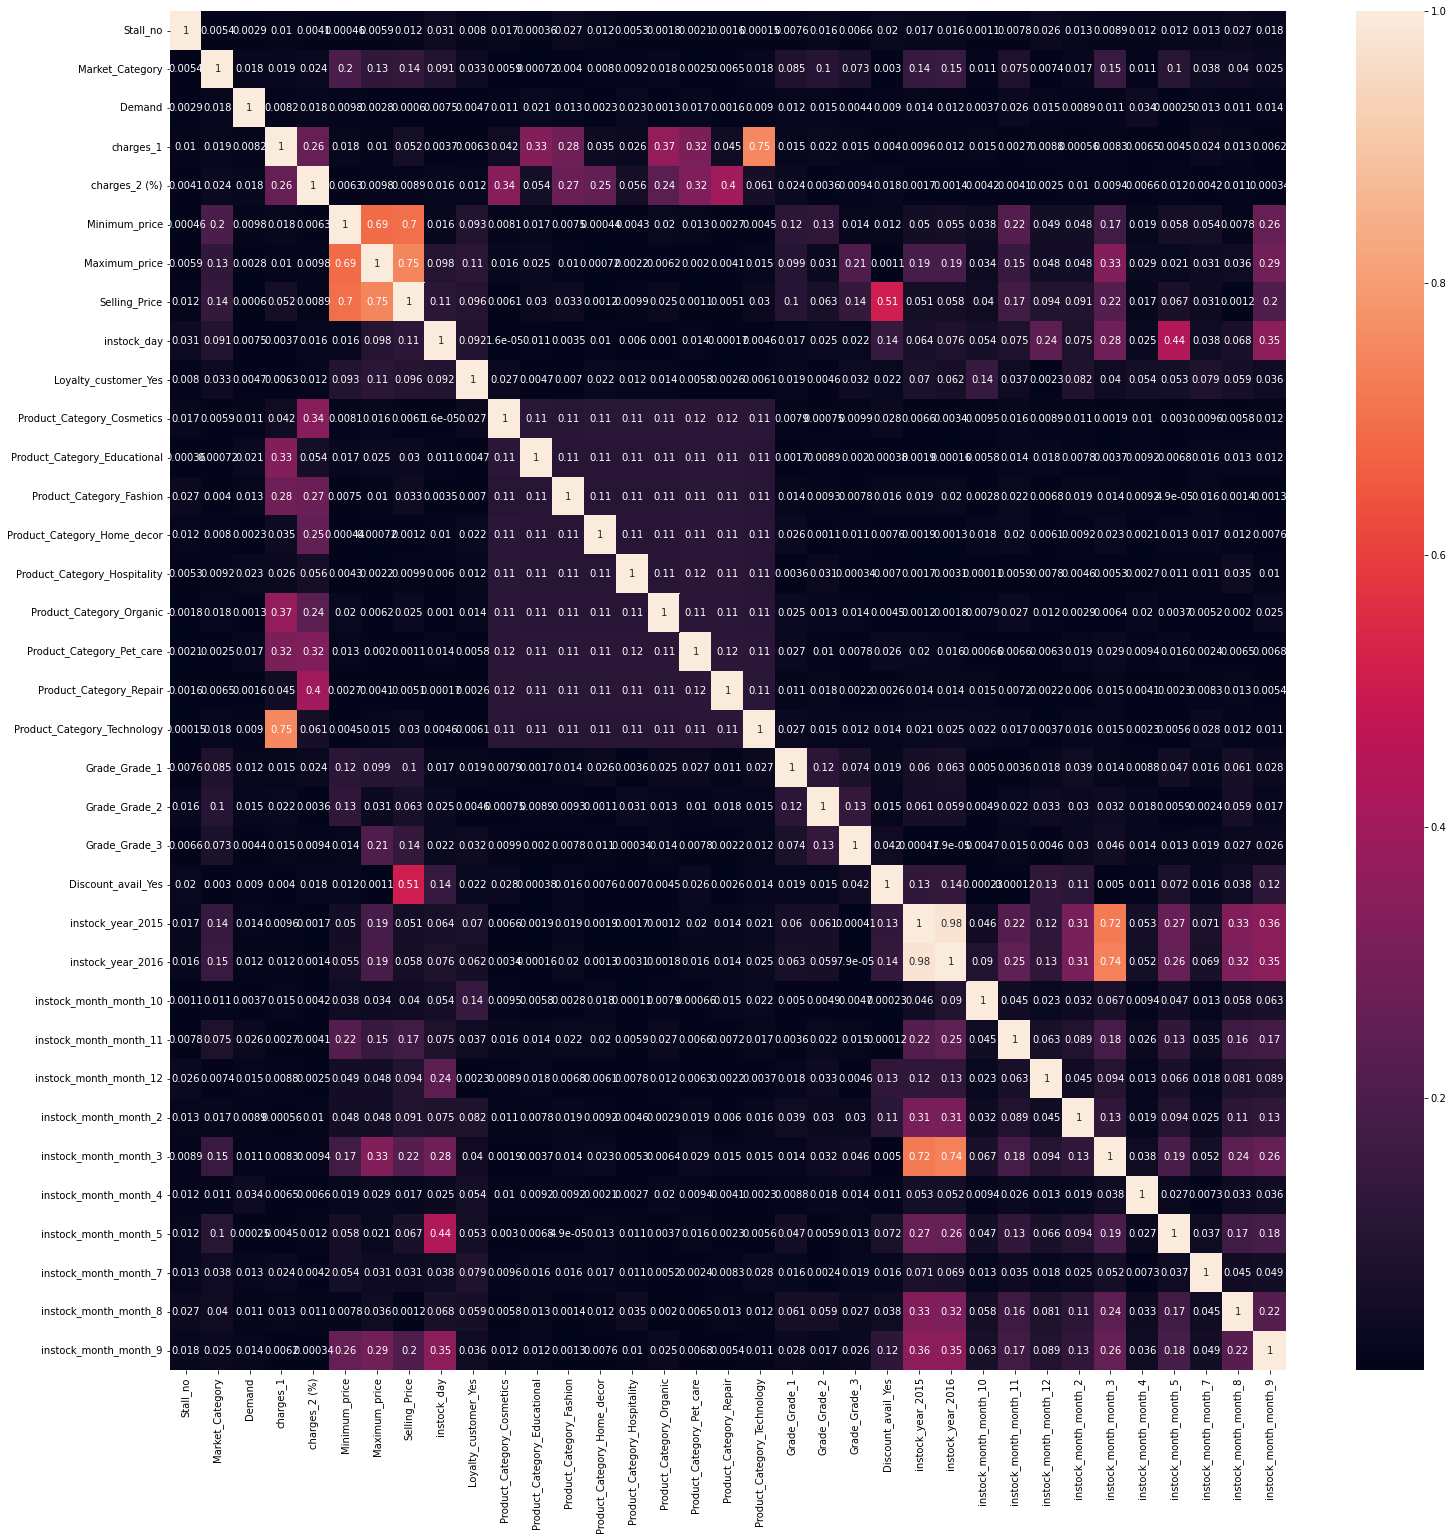

In [55]:
plt.figure(figsize=(25, 25))
sns.heatmap(abs(df_num.corr()), annot=True)
plt.show()

In [56]:
cor_mat= df_num.corr()
corr  = cor_mat.abs()
corr = corr.unstack()
corr = corr.sort_values(kind='quicksort').dropna()
corr  = corr[corr !=1 ]

In [57]:
corr= corr.sort_values(ascending=False)
corr[::2].head(15)

instock_year_2016            instock_year_2015             0.979646
Product_Category_Technology  charges_1                     0.753219
Maximum_price                Selling_Price                 0.749453
instock_month_month_3        instock_year_2016             0.737231
                             instock_year_2015             0.722125
Minimum_price                Selling_Price                 0.698393
Maximum_price                Minimum_price                 0.689177
Discount_avail_Yes           Selling_Price                 0.510635
instock_month_month_5        instock_day                   0.440622
charges_2 (%)                Product_Category_Repair       0.401836
Product_Category_Organic     charges_1                     0.367494
instock_year_2015            instock_month_month_9         0.355406
instock_month_month_9        instock_day                   0.349405
instock_year_2016            instock_month_month_9         0.348172
charges_2 (%)                Product_Category_Co

In [58]:
col_to_drop= ['instock_year_2015', 'charges_1', 'Maximum_price', 'instock_month_month_3']
df_num.drop(col_to_drop, axis=1, inplace=True)
cor_mat= df_num.corr()
corr  = cor_mat.abs()
corr = corr.unstack()
corr = corr.sort_values(kind='quicksort').dropna()
corr  = corr[corr !=1 ]
corr= corr.sort_values(ascending=False)
corr[::2].head(15)

Selling_Price               Minimum_price                  0.698393
                            Discount_avail_Yes             0.510635
instock_month_month_5       instock_day                    0.440622
charges_2 (%)               Product_Category_Repair        0.401836
instock_month_month_9       instock_day                    0.349405
instock_year_2016           instock_month_month_9          0.348172
Product_Category_Cosmetics  charges_2 (%)                  0.343624
Product_Category_Pet_care   charges_2 (%)                  0.323508
instock_year_2016           instock_month_month_8          0.318803
instock_month_month_2       instock_year_2016              0.306941
Product_Category_Fashion    charges_2 (%)                  0.271877
instock_month_month_9       Minimum_price                  0.263487
instock_year_2016           instock_month_month_5          0.260750
charges_2 (%)               Product_Category_Home_decor    0.251828
instock_year_2016           instock_month_month_

Splitting the dependent variable from the dataset

In [59]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_num, test_size= 0.25, random_state= 42)
print(df_train.shape, df_test.shape)

(4745, 31) (1582, 31)


In [60]:
y_train= df_train.pop('Selling_Price')
X_train= df_train

y_test= df_test.pop('Selling_Price')
X_test= df_test

In [125]:
X_train.head()

,Stall_no,Market_Category,Demand,charges_1,charges_2 (%),Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TSHE5YZCKAZYG7MS,39.0,188,68,253.0,11.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
BRAE9G83ZYF7H56E,11.0,36,80,367.0,15.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
HJREGXNFQMRPYVU3,2.0,447,47,222.0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
NKCE48ZUDSVFZDZJ,40.0,14,78,145.0,8.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
NKCECEBZYG9NCPBW,7.0,108,4,203.0,14.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
col= X_train.columns
X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, index=X_train.index)
X_train_scaled.columns= col
X_train_scaled.head()

,Stall_no,Market_Category,Demand,charges_2 (%),Minimum_price,instock_day,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TSHE5YZCKAZYG7MS,0.775510,0.399151,0.676768,0.6250,0.153837,0.933333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRAE9G83ZYF7H56E,0.204082,0.076433,0.797980,0.8750,0.172654,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HJREGXNFQMRPYVU3,0.020408,0.949045,0.464646,0.8750,0.156973,0.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NKCE48ZUDSVFZDZJ,0.795918,0.029724,0.777778,0.4375,0.192040,0.800000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NKCECEBZYG9NCPBW,0.122449,0.229299,0.030303,0.8125,0.148820,0.533333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled, index= X_test.index)
X_test_scaled.columns= col
X_test_scaled.head()

,Stall_no,Market_Category,Demand,charges_2 (%),Minimum_price,instock_day,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NKCE5DGMHZTD8HQX,0.816327,0.420382,0.323232,0.2500,0.136218,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CAGEBTGENZ9HQGQR,0.122449,0.467091,0.858586,0.5625,0.233151,0.166667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PCSECYY4V8WYRVFY,0.285714,0.464968,0.242424,0.7500,0.695404,0.700000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NKCECWKZZWHHAHQH,0.081633,0.569002,0.898990,1.0000,0.048295,0.766667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PCSEE4H5ADZDDMSR,0.693878,0.995754,0.464646,0.7500,0.325009,0.566667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Training using Statsmodel

In [63]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X, y):
  X= sm.add_constant(X)
  lm= sm.OLS(y, X).fit()
  print(lm.summary())
  return lm

def check_vif(X):
  vif= pd.DataFrame()
  vif['Features']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF']= round(vif['VIF'], 2)
  vif= vif.sort_values(by= 'VIF', ascending=False)
  return vif




In [64]:
build_model(X_train_scaled, y_train)
check_vif(X_train_scaled)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     607.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:48:57   Log-Likelihood:                -40885.
No. Observations:                4745   AIC:                         8.183e+04
Df Residuals:                    4714   BIC:                         8.203e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
3,charges_2 (%),10.86
20,instock_year_2016,10.30
5,instock_day,8.48
29,instock_month_month_9,7.04
28,instock_month_month_8,5.86
4,Minimum_price,4.55
22,instock_month_month_11,4.34
26,instock_month_month_5,4.10
2,Demand,3.94
0,Stall_no,3.77


In [65]:
X_train_scaled.shape

(4745, 30)

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
rfe= RFE(lm, n_features_to_select=20)
rfe= rfe.fit(X_train_scaled, y_train)

In [77]:
col= list(X_train_scaled.columns[rfe.support_])
print(col)

['Minimum_price', 'instock_day', 'Product_Category_Cosmetics', 'Product_Category_Educational', 'Product_Category_Home_decor', 'Product_Category_Hospitality', 'Product_Category_Organic', 'Product_Category_Pet_care', 'Product_Category_Repair', 'Grade_Grade_1', 'Grade_Grade_2', 'Grade_Grade_3', 'Discount_avail_Yes', 'instock_year_2016', 'instock_month_month_11', 'instock_month_month_12', 'instock_month_month_2', 'instock_month_month_5', 'instock_month_month_7', 'instock_month_month_9']


In [78]:
build_model(X_train_scaled[col], y_train)
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     911.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:51:56   Log-Likelihood:                -40889.
No. Observations:                4745   AIC:                         8.182e+04
Df Residuals:                    4724   BIC:                         8.196e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
1,instock_day,5.31
0,Minimum_price,3.87
13,instock_year_2016,2.42
19,instock_month_month_9,1.97
14,instock_month_month_11,1.50
17,instock_month_month_5,1.40
8,Product_Category_Repair,1.31
7,Product_Category_Pet_care,1.30
2,Product_Category_Cosmetics,1.29
4,Product_Category_Home_decor,1.27


In [79]:
col.remove('instock_month_month_7')

In [80]:
build_model(X_train_scaled[col], y_train)
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     959.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:52:47   Log-Likelihood:                -40889.
No. Observations:                4745   AIC:                         8.182e+04
Df Residuals:                    4725   BIC:                         8.195e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
1,instock_day,5.27
0,Minimum_price,3.85
13,instock_year_2016,2.37
18,instock_month_month_9,1.94
14,instock_month_month_11,1.48
17,instock_month_month_5,1.39
7,Product_Category_Pet_care,1.30
8,Product_Category_Repair,1.30
2,Product_Category_Cosmetics,1.29
4,Product_Category_Home_decor,1.27


In [81]:
col.remove('Product_Category_Home_decor')
build_model(X_train_scaled[col], y_train)
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1012.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:53:51   Log-Likelihood:                -40891.
No. Observations:                4745   AIC:                         8.182e+04
Df Residuals:                    4726   BIC:                         8.194e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
1,instock_day,5.10
0,Minimum_price,3.83
12,instock_year_2016,2.36
17,instock_month_month_9,1.94
13,instock_month_month_11,1.47
16,instock_month_month_5,1.36
9,Grade_Grade_2,1.26
6,Product_Category_Pet_care,1.24
7,Product_Category_Repair,1.24
2,Product_Category_Cosmetics,1.23


In [82]:

col.remove('Product_Category_Hospitality')
build_model(X_train_scaled[col], y_train)
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:54:37   Log-Likelihood:                -40892.
No. Observations:                4745   AIC:                         8.182e+04
Df Residuals:                    4727   BIC:                         8.194e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
1,instock_day,4.99
0,Minimum_price,3.81
11,instock_year_2016,2.35
16,instock_month_month_9,1.93
12,instock_month_month_11,1.47
15,instock_month_month_5,1.35
8,Grade_Grade_2,1.25
10,Discount_avail_Yes,1.21
5,Product_Category_Pet_care,1.20
6,Product_Category_Repair,1.20


In [83]:
col.remove('instock_day')
build_model(X_train_scaled[col], y_train)
check_vif(X_train_scaled[col])

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1121.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:55:28   Log-Likelihood:                -40920.
No. Observations:                4745   AIC:                         8.187e+04
Df Residuals:                    4728   BIC:                         8.198e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,Minimum_price,2.82
10,instock_year_2016,2.08
11,instock_month_month_11,1.46
14,instock_month_month_5,1.32
15,instock_month_month_9,1.29
7,Grade_Grade_2,1.23
9,Discount_avail_Yes,1.21
4,Product_Category_Pet_care,1.18
5,Product_Category_Repair,1.18
13,instock_month_month_2,1.18


### Using Decision Tree Regressor from Sklearn

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [95]:
tree= DecisionTreeRegressor(random_state=42)
params= {'max_depth': [5,9,10, 15],
         'min_samples_split': [35,40,45,50]}
gstree= GridSearchCV(tree, param_grid=params, cv=4, scoring= 'neg_mean_squared_error', verbose=1)
gstree.fit(X_train[col], y_train)
gstree.best_params_

Fitting 4 folds for each of 16 candidates, totalling 64 fits


{'max_depth': 9, 'min_samples_split': 45}

In [96]:
tree= DecisionTreeRegressor(max_depth=9, min_samples_split=45, random_state= 42)
tree.fit(X_train[col], y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=45, random_state=42)

In [97]:
y_train_pred= tree.predict(X_train[col])
result= pd.DataFrame({'Actual': y_train, 'Prediction' : y_train_pred}, index= X_train.index)
result.head()

,Actual,Prediction
Product_id,,
TSHE5YZCKAZYG7MS,4020.568200,4777.424425
BRAE9G83ZYF7H56E,3926.588175,3915.457445
HJREGXNFQMRPYVU3,715.520174,674.003969
NKCE48ZUDSVFZDZJ,3927.389400,4219.051501
NKCECEBZYG9NCPBW,4732.356717,4510.134480


In [98]:
y_test_pred= tree.predict(X_test[col])
test_result= pd.DataFrame({'Actual': y_test, 'Prediction' : y_test_pred}, index= X_test.index)
test_result.head()

,Actual,Prediction
Product_id,,
NKCE5DGMHZTD8HQX,3017.886375,3915.457445
CAGEBTGENZ9HQGQR,731.317171,844.201925
PCSECYY4V8WYRVFY,2260.805321,2094.213795
NKCECWKZZWHHAHQH,2418.445568,2287.697005
PCSEE4H5ADZDDMSR,7286.217840,7250.513761


In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("-----------------TRAIN RESULTS-------------")
print("MAE: ", mean_absolute_error(result.Actual, result.Prediction))
print("MSE: ", mean_squared_error(result.Actual, result.Prediction))
print("R2 SCORE: ", r2_score(result.Actual, result.Prediction))

print("-----------------TEST RESULTS-------------")
print("MAE: ", mean_absolute_error(test_result.Actual, test_result.Prediction))
print("MSE: ", mean_squared_error(test_result.Actual, test_result.Prediction))
print("R2 SCORE: ", r2_score(test_result.Actual, test_result.Prediction))

-----------------TRAIN RESULTS-------------
MAE:  586.7945444735609
MSE:  1022835.9390221603
R2 SCORE:  0.8822462803509026
-----------------TEST RESULTS-------------
MAE:  694.8736342089412
MSE:  1531780.9956136323
R2 SCORE:  0.8375563166474841


### R2 score for training is 88.2% and for test it is 83.75%
## Using Random Forest method

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf= RandomForestRegressor(random_state=42)
params= {'max_depth': [5,9,10],
         'min_samples_split': [15,20,30,35],
         'n_estimators': [150,200,300]}
gsrf= GridSearchCV(rf, param_grid=params, cv=4, scoring= 'neg_mean_squared_error', verbose=1)
gsrf.fit(X_train[col], y_train)
gsrf.best_params_

Fitting 4 folds for each of 36 candidates, totalling 144 fits


{'max_depth': 9, 'min_samples_split': 15, 'n_estimators': 200}

In [104]:
rf= RandomForestRegressor(max_depth=9, min_samples_split=15, random_state= 42, n_estimators=200)
rf.fit(X_train[col], y_train)

RandomForestRegressor(max_depth=9, min_samples_split=15, n_estimators=200,
                      random_state=42)

In [105]:
y_train_pred= rf.predict(X_train[col])
result= pd.DataFrame({'Actual': y_train, 'Prediction' : y_train_pred}, index= X_train.index)
result.head()

,Actual,Prediction
Product_id,,
TSHE5YZCKAZYG7MS,4020.568200,4476.911571
BRAE9G83ZYF7H56E,3926.588175,4226.807258
HJREGXNFQMRPYVU3,715.520174,647.877775
NKCE48ZUDSVFZDZJ,3927.389400,4371.922648
NKCECEBZYG9NCPBW,4732.356717,4228.839003


In [106]:
y_test_pred= rf.predict(X_test[col])
test_result= pd.DataFrame({'Actual': y_test, 'Prediction' : y_test_pred}, index= X_test.index)
test_result.head()

,Actual,Prediction
Product_id,,
NKCE5DGMHZTD8HQX,3017.886375,3706.353660
CAGEBTGENZ9HQGQR,731.317171,886.450852
PCSECYY4V8WYRVFY,2260.805321,2227.659626
NKCECWKZZWHHAHQH,2418.445568,2360.932632
PCSEE4H5ADZDDMSR,7286.217840,7307.214518


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("-----------------TRAIN RESULTS-------------")
print("MAE: ", mean_absolute_error(result.Actual, result.Prediction))
print("MSE: ", mean_squared_error(result.Actual, result.Prediction))
print("R2 SCORE: ", r2_score(result.Actual, result.Prediction))

print("-----------------TEST RESULTS-------------")
print("MAE: ", mean_absolute_error(test_result.Actual, test_result.Prediction))
print("MSE: ", mean_squared_error(test_result.Actual, test_result.Prediction))
print("R2 SCORE: ", r2_score(test_result.Actual, test_result.Prediction))

-----------------TRAIN RESULTS-------------
MAE:  545.646700186996
MSE:  883426.2621092402
R2 SCORE:  0.89829578290091
-----------------TEST RESULTS-------------
MAE:  643.0321349889376
MSE:  1347777.426099898
R2 SCORE:  0.8570696920369258


## Random forest gives better results with R2 score of 89.8% on training set and 85.7% on test dataset.

In [108]:
df_test= pd.read_csv('/content/drive/MyDrive/Machine_Learning/Halloween_price_prediction/test.csv')
df_test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [109]:
df_test.shape

(3430, 14)

In [110]:
df_test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [111]:
df_test.set_index('Product_id', inplace= True)
df_test.head()

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
Product_id,,,,,,,,,,,,,
SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [112]:
df_test['instock_date']= pd.to_datetime(df_test['instock_date'])
df_test['instock_year'] = df_test['instock_date'].dt.year
df_test['instock_month'] = df_test['instock_date'].dt.month
df_test['instock_day'] = df_test['instock_date'].dt.day
df_test.head()

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day
Product_id,,,,,,,,,,,,,,,,
SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340,2016,1,13
ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955,2015,8,23
NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715,2015,11,14
NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078,2015,11,21
TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244,2015,5,6


In [113]:
df_test.Stall_no= df_test.Stall_no.fillna(df_test.Stall_no.mode()[0])
df_test.charges_1 = df_test.charges_1.fillna(df_test.charges_1.median())
df_test.Minimum_price = df_test.Minimum_price.fillna(df_test.Minimum_price.median())
df_test.drop('Customer_name', axis=1, inplace=True)
df_test.isnull().sum()

Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       5
Minimum_price       0
Maximum_price       0
instock_year        0
instock_month       0
instock_day         0
dtype: int64

In [114]:
df_test['Discount_avail'] = df_test['Discount_avail'].apply(lambda x: 'Yes' if x == 1.0 else 'No')
df_test['instock_year'] = df_test['instock_year'].apply(lambda x : str(x))
df_test['instock_month'] = df_test['instock_month'].apply(lambda x : 'month_' + str(x))
df_test['Grade'] = df_test['Grade'].apply(lambda x : 'Grade_'+str(x))

In [115]:
df_dummy.columns

Index(['Loyalty_customer_Yes', 'Product_Category_Cosmetics',
       'Product_Category_Educational', 'Product_Category_Fashion',
       'Product_Category_Home_decor', 'Product_Category_Hospitality',
       'Product_Category_Organic', 'Product_Category_Pet_care',
       'Product_Category_Repair', 'Product_Category_Technology',
       'Grade_Grade_1', 'Grade_Grade_2', 'Grade_Grade_3', 'Discount_avail_Yes',
       'instock_year_2015', 'instock_year_2016', 'instock_month_month_10',
       'instock_month_month_11', 'instock_month_month_12',
       'instock_month_month_2', 'instock_month_month_3',
       'instock_month_month_4', 'instock_month_month_5',
       'instock_month_month_7', 'instock_month_month_8',
       'instock_month_month_9'],
      dtype='object')

In [117]:
cat_cols= list(df_test.select_dtypes('object').columns)
df_test_dummy= pd.get_dummies(df_test[cat_cols], drop_first=True )
df_test_dummy.head()

,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2015,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_3,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,
SCHE4YSTDVPVZVXW,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
ACCEGCATKHNRXUHW,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
NKCE6GJ5XVJDXNNZ,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
NKCEB8BK3ZXDHDHM,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
TOPEFDXSAHRNPF94,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [118]:
df_test_num= pd.concat([df_test, df_test_dummy], axis= 1)
df_test_num.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Grade_Grade_1,Grade_Grade_2,Grade_Grade_3,Discount_avail_Yes,instock_year_2015,instock_year_2016,instock_month_month_10,instock_month_month_11,instock_month_month_12,instock_month_month_2,instock_month_month_3,instock_month_month_4,instock_month_month_5,instock_month_month_7,instock_month_month_8,instock_month_month_9
Product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,No,Fashion,Grade_0,90,No,380.0,16.0,2576.0,3340,2016,month_1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Yes,Fashion,Grade_0,87,No,393.0,16.0,1202.0,1955,2015,month_8,23,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,No,Technology,Grade_2,55,No,493.0,9.0,7175.0,15715,2015,month_11,14,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Yes,Child_care,Grade_3,86,No,303.0,16.0,5404.0,13078,2015,month_11,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,No,Technology,Grade_0,27,No,567.0,16.0,4069.0,6244,2015,month_5,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [119]:
df_test_num.drop(cat_cols, axis=1, inplace=True)
df_test_num.drop('instock_date', axis=1, inplace=True)

In [120]:
col

['Minimum_price',
 'Product_Category_Cosmetics',
 'Product_Category_Educational',
 'Product_Category_Organic',
 'Product_Category_Pet_care',
 'Product_Category_Repair',
 'Grade_Grade_1',
 'Grade_Grade_2',
 'Grade_Grade_3',
 'Discount_avail_Yes',
 'instock_year_2016',
 'instock_month_month_11',
 'instock_month_month_12',
 'instock_month_month_2',
 'instock_month_month_5',
 'instock_month_month_9']

In [121]:
df_test_num.columns

Index(['Stall_no', 'Market_Category', 'Demand', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'instock_day', 'Loyalty_customer_Yes',
       'Product_Category_Cosmetics', 'Product_Category_Educational',
       'Product_Category_Fashion', 'Product_Category_Home_decor',
       'Product_Category_Hospitality', 'Product_Category_Organic',
       'Product_Category_Pet_care', 'Product_Category_Repair',
       'Product_Category_Technology', 'Grade_Grade_1', 'Grade_Grade_2',
       'Grade_Grade_3', 'Discount_avail_Yes', 'instock_year_2015',
       'instock_year_2016', 'instock_month_month_10', 'instock_month_month_11',
       'instock_month_month_12', 'instock_month_month_2',
       'instock_month_month_3', 'instock_month_month_4',
       'instock_month_month_5', 'instock_month_month_7',
       'instock_month_month_8', 'instock_month_month_9'],
      dtype='object')

In [126]:
fin_pred= rf.predict(df_test_num[col])
submit= pd.DataFrame({'Product_id': df_test.index,
                      'Selling_Price': fin_pred})
submit.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,4572.125579
1,ACCEGCATKHNRXUHW,2349.571268
2,NKCE6GJ5XVJDXNNZ,8755.218100
3,NKCEB8BK3ZXDHDHM,9610.362811
4,TOPEFDXSAHRNPF94,5261.554494


In [127]:
submit.to_csv('/content/drive/MyDrive/Machine_Learning/Halloween_price_prediction/rahul.csv')